In [17]:
import numpy as np
import pandas as pd

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

In [32]:
df.shape

(16200, 123)

In [118]:
df = pd.read_csv("results/2022_01_06_training_set.csv")
df = df.groupby("midlat_deg").mean()
del df["inclination_deg"]
# del df["nflares"]

In [119]:
df = df.reset_index()

In [120]:
df = df.fillna(-999)

In [121]:
df.iloc[:, 1:].columns

Index(['nflares', 'ed_rec_mean', 'ed_rec_median', 'ed_rec_std', 'ed_rec_min',
       'ed_rec_max', 'diff_ed_rec_mean_stepsize1',
       'diff_ed_rec_median_stepsize1', 'diff_ed_rec_std_stepsize1',
       'diff_ed_rec_min_stepsize1',
       ...
       'diff_amp_over_ed_rec_mean_stepsize2',
       'diff_amp_over_ed_rec_median_stepsize2',
       'diff_amp_over_ed_rec_std_stepsize2',
       'diff_amp_over_ed_rec_min_stepsize2',
       'diff_amp_over_ed_rec_max_stepsize2',
       'diff_amp_over_ed_rec_mean_stepsize3',
       'diff_amp_over_ed_rec_median_stepsize3',
       'diff_amp_over_ed_rec_std_stepsize3',
       'diff_amp_over_ed_rec_min_stepsize3',
       'diff_amp_over_ed_rec_max_stepsize3'],
      dtype='object', length=121)

In [122]:
x = df.iloc[:, 1:].values 
x.shape

(81, 121)

In [123]:
y = df.reset_index().midlat_deg.values
y

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85.])

In [124]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

In [125]:
# read validation data
valid = pd.read_csv("results/2022_01_06_validation_set.csv")

In [126]:
valid = valid.fillna(-999)

del valid["inclination_deg"]
# del valid["nflares"]
valid = valid.groupby("midlat_deg").mean()
validx = valid.iloc[:, :].values 
validy = valid.reset_index().midlat_deg.values
validy

array([ 5.        ,  7.05128205,  9.1025641 , 11.15384615, 13.20512821,
       15.25641026, 17.30769231, 19.35897436, 21.41025641, 23.46153846,
       25.51282051, 27.56410256, 29.61538462, 31.66666667, 33.71794872,
       35.76923077, 37.82051282, 39.87179487, 41.92307692, 43.97435897,
       46.02564103, 48.07692308, 50.12820513, 52.17948718, 54.23076923,
       56.28205128, 58.33333333, 60.38461538, 62.43589744, 64.48717949,
       66.53846154, 68.58974359, 70.64102564, 72.69230769, 74.74358974,
       76.79487179, 78.84615385, 80.8974359 , 82.94871795, 85.        ])

In [127]:
validx.shape

(40, 121)

In [128]:
y = df.reset_index().midlat_deg.values


In [129]:
predictions = regressor.predict(validx)

In [130]:
errors = predictions - validy

Text(0, 0.5, 'prediction')

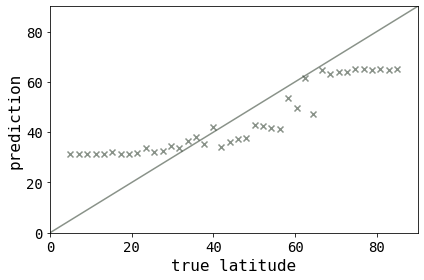

In [131]:
%matplotlib inline
plt.scatter(validy, predictions)
plt.plot([0,90],[0,90])
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel("true latitude")
plt.ylabel("prediction")

In [113]:
feature_list = list(valid.iloc[:, 2:].columns.values)

In [114]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: amp_over_ed_rec_mean Importance: 0.27
Variable: diff_dur_over_ed_rec_median_stepsize3 Importance: 0.04
Variable: dur_over_amp_mean    Importance: 0.03
Variable: diff_dur_over_ed_rec_mean_stepsize3 Importance: 0.03
Variable: diff_amp_over_ed_rec_median_stepsize1 Importance: 0.03
Variable: diff_amp_over_ed_rec_median_stepsize3 Importance: 0.03
Variable: amp_over_ed_rec_median Importance: 0.02
Variable: diff_amp_over_ed_rec_mean_stepsize2 Importance: 0.02
Variable: diff_amp_over_ed_rec_mean_stepsize3 Importance: 0.02
Variable: dur_max              Importance: 0.01
Variable: dur_over_amp_median  Importance: 0.01
Variable: dur_over_amp_min     Importance: 0.01
Variable: diff_dur_over_amp_mean_stepsize1 Importance: 0.01
Variable: diff_dur_over_ed_rec_median_stepsize1 Importance: 0.01
Variable: diff_dur_over_ed_rec_mean_stepsize2 Importance: 0.01
Variable: ed_rec_std           Importance: 0.0
Variable: ed_rec_min           Importance: 0.0
Variable: ed_rec_max           Importance: 0